In [7]:
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

In [18]:
client.search_experiments(filter_string="name='nyc-taxi-exp'")[0]

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/1', creation_time=1715959168737, experiment_id='1', last_update_time=1715959168737, lifecycle_stage='active', name='nyc-taxi-exp', tags={}>

In [30]:
runs = client.search_runs(
    experiment_ids = "1",
    order_by = ["metrics.val_rmse ASC","metrics.train_rmse ASC"],
    max_results = 4,
)

for run in runs:
    print(f"run name:{run.info.run_name} id:{run.info.run_id} train_rmse:{run.data.metrics['train_rmse']} val_rmse:{run.data.metrics['val_rmse']}")

run name:rebellious-newt-904 id:e94c7c8f1f7b452fb7a3f855203ca19a train_rmse:5.133258299449133 val_rmse:5.24756029797959
run name:popular-crow-749 id:e0aaf73a43c44ff6b429ade825e09171 train_rmse:7.649261932106969 val_rmse:7.811818743246608
run name:chill-duck-470 id:e4e5ac11664945b89d9812c5d40207ee train_rmse:7.649261932106969 val_rmse:7.811818743246608
run name:calm-gnat-318 id:3448fa179adf4d04b484280eba1f12d2 train_rmse:7.649261932106969 val_rmse:7.811818743246608


In [50]:
# registered_models = client.search_registered_models()
registered_models = client.search_model_versions("name='nyc-taxi-model'")

for register_model in registered_models:
    print(f"version:{register_model.version}, id:{register_model.run_id}")

version:2, id:e0c16d31de3f4df7979d1f6a378f03dd
version:1, id:e94c7c8f1f7b452fb7a3f855203ca19a


In [63]:
import mlflow

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

for registered_model in registered_models:
    print(f"version:{register_model.version}, id:{registered_model.run_id}")
    curr_run = mlflow.get_run(run_id=registered_model.run_id)
    print(curr_run)

version:1, id:e0c16d31de3f4df7979d1f6a378f03dd
<Run: data=<RunData: metrics={'train_rmse': 7.658396898909143, 'val_rmse': 7.820263388747155}, params={'categorical_cols': "['PULocationID', 'DOLocationID']",
 'numerical_cols': "['trip_distance']",
 'training_data': 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet',
 'validation_data': 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'}, tags={'Scientist': 'Anuj Panthri',
 'mlflow.log-model.history': '[{"run_id": "e0c16d31de3f4df7979d1f6a378f03dd", '
                             '"artifact_path": "sklearn_model", '
                             '"utc_time_created": "2024-05-19 '
                             '13:26:58.079913", "flavors": {"python_function": '
                             '{"model_path": "model.pkl", "predict_fn": '
                             '"predict", "loader_module": "mlflow.sklearn", '
                             '"python_version": "3.9.19", "env": {"cond

In [64]:
print(f"version:{registered_model.version}, id:{registered_model.run_id}")
curr_run = mlflow.get_run(run_id=register_model.run_id)
print(curr_run)
# curr_run.

# mlflow.sklearn.load_model(model_uri=)
curr_run.data.tags["mlflow.log-model.history"]

version:1, id:e94c7c8f1f7b452fb7a3f855203ca19a
<Run: data=<RunData: metrics={'train_rmse': 5.133258299449133, 'val_rmse': 5.24756029797959}, params={'categorical_cols': "['PU_DO']",
 'numerical_cols': "['trip_distance']",
 'training_data': 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet',
 'validation_data': 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'}, tags={'Scientist': 'Anuj Panthri',
 'mlflow.log-model.history': '[{"run_id": "e94c7c8f1f7b452fb7a3f855203ca19a", '
                             '"artifact_path": "sklearn_model", '
                             '"utc_time_created": "2024-05-19 '
                             '13:28:16.653511", "flavors": {"python_function": '
                             '{"model_path": "model.pkl", "predict_fn": '
                             '"predict", "loader_module": "mlflow.sklearn", '
                             '"python_version": "3.9.19", "env": {"conda": '
                  

'[{"run_id": "e94c7c8f1f7b452fb7a3f855203ca19a", "artifact_path": "sklearn_model", "utc_time_created": "2024-05-19 13:28:16.653511", "flavors": {"python_function": {"model_path": "model.pkl", "predict_fn": "predict", "loader_module": "mlflow.sklearn", "python_version": "3.9.19", "env": {"conda": "conda.yaml", "virtualenv": "python_env.yaml"}}, "sklearn": {"pickled_model": "model.pkl", "sklearn_version": "1.4.2", "serialization_format": "cloudpickle", "code": null}}, "model_uuid": "8e6eb140f6d744808a949bb020372b78", "mlflow_version": "2.12.2", "model_size_bytes": 174781}]'

In [111]:
import pickle

model_name = "nyc-taxi-model"

def get_model_data(model_version):
    registered_model = client.get_model_version(model_name,model_version)
    model_uri = f"models:/{model_name}/{model_version}"
    preprocessor_uri = f'runs:/{registered_model.run_id}/preprocessing'
    
    mlflow.artifacts.download_artifacts(artifact_uri = preprocessor_uri,dst_path=".")
    model = mlflow.sklearn.load_model(model_uri)
    dv = pickle.load(open("preprocessing/preprocessor.b",'rb'))
    
    categorical = eval(curr_run.data.params["categorical_cols"])
    numerical = eval(curr_run.data.params["numerical_cols"])

    return model,categorical,numerical,dv

model,categorical,numerical,dv = get_model_data(model_version = 1)
categorical,numerical

(['PU_DO'], ['trip_distance'])

In [114]:
from sklearn.metrics import mean_squared_error
import pandas as pd

def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    # only use rides which were between 1 to 60 minutes
    valid_rows = (df.duration>=1) & (df.duration<=60)
    df = df[valid_rows]
    df[["PULocationID", "DOLocationID"]] = df[["PULocationID", "DOLocationID"]].astype(str)

    return df

def preprocess(df,categorical,numerical,dv):
    # feature engineering
    df["PU_DO"] = df["PULocationID"] + "_" + df["DOLocationID"]
    
    data_dicts = df[categorical + numerical].to_dict(orient="records")
    X = dv.transform(data_dicts)
    
    target = "duration"
    y = df[target].values
    
    return X,y

def test_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    return {"rmse":rmse}

In [115]:
model,categorical,numerical,dv = get_model_data(model_version = 1)
df = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
X,y_true = preprocess(df,categorical,numerical,dv)

%time test_model(model,X,y_true)

CPU times: user 16.9 ms, sys: 109 µs, total: 17 ms
Wall time: 16.8 ms


/home/codespace/anaconda3/envs/exp-tracking/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'rmse': 5.133258299449133}

In [119]:
model,categorical,numerical,dv = get_model_data(model_version = 1)
df = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")
X,y_true = preprocess(df,categorical,numerical,dv)

%time test_model(model,X,y_true)

CPU times: user 22.9 ms, sys: 0 ns, total: 22.9 ms
Wall time: 24.2 ms


/home/codespace/anaconda3/envs/exp-tracking/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'rmse': 5.710342498162453}

In [120]:
X.shape

(3316216, 21802)

/tmp/ipykernel_12785/334906768.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_true,label="actual")
/tmp/ipykernel_12785/334906768.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="predicted")


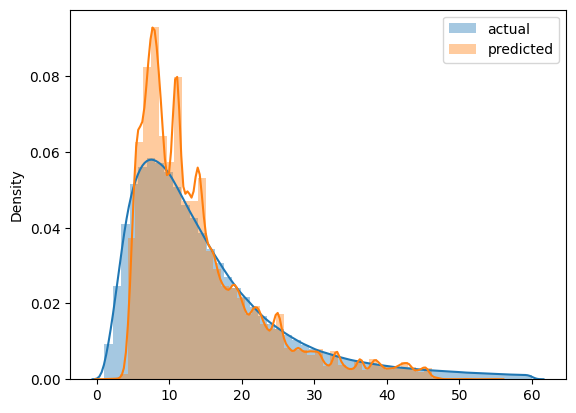

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)
sns.distplot(y_true,label="actual")
sns.distplot(y_pred,label="predicted")
plt.legend()

In [117]:
model,categorical,numerical,dv = get_model_data(model_version = 2)
df = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")
X,y_true = preprocess(df,categorical,numerical,dv)

%time test_model(model,X,y_true)

CPU times: user 16.3 ms, sys: 39 µs, total: 16.3 ms
Wall time: 16 ms


/home/codespace/anaconda3/envs/exp-tracking/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'rmse': 12.650307350968557}

In [118]:
X.shape

(3316216, 516)